#  Artificial Neural Network (ANN) 

##  What is an Artificial Neural Network?
An Artificial Neural Network (ANN) is a type of machine learning model inspired by how the human brain works.

It consists of layers of interconnected neurons (nodes) that learn patterns from data and make predictions.

##  Why Use ANNs?
- Learns complex nonlinear relationships
- Foundation of Deep Learning

##  ANN Structure
Input Layer --> Hidden Layer(s) --> Output Layer

Each layer contains neurons:
- Input Layer: Takes raw input features
- Hidden Layer: Learns internal representations
- Output Layer: Makes predictions (e.g. 0 or 1)

In [55]:
import warnings

# This will ignore all warnings
warnings.filterwarnings("ignore")


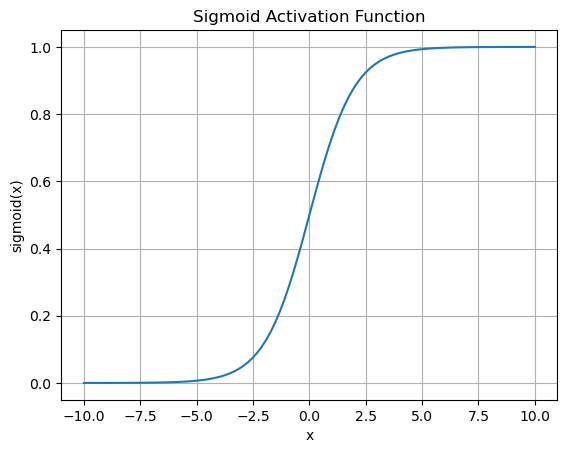

In [56]:
#  Sigmoid Activation Function
import numpy as np
import matplotlib.pyplot as plt

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x_vals = np.linspace(-10, 10, 100)
y_vals = sigmoid(x_vals)

plt.plot(x_vals, y_vals)
plt.title("Sigmoid Activation Function")
plt.xlabel("x")
plt.ylabel("sigmoid(x)")
plt.grid()
plt.show()

- Plots the curve of the sigmoid function.

- Shows how the function smoothly squashes values between 0 and 1.

In [57]:
#  Load and Prepare Dataset
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler



In [58]:
data = pd.read_csv("breast_cancer.csv")
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [59]:

X = data.iloc[:, 2:-1]
y = data['diagnosis'].map({'B': 0, 'M': 1})
X


,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [60]:
y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

In [61]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_scaled

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

- StandardScaler standardizes features by removing the mean and scaling to unit variance.

In [62]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
X_train

array([[-1.44798723, -0.45602336, -1.36665103, ...,  0.91959172,
         2.14719008,  1.85943247],
       [ 1.97750799,  1.69418666,  2.08961867, ...,  2.6752184 ,
         1.9368786 ,  2.46346488],
       [-1.40708919, -1.26351565, -1.34976305, ..., -0.97048581,
         0.61676962,  0.05287682],
       ...,
       [ 0.04621146, -0.57470379, -0.06874782, ..., -1.23756033,
        -0.71628161, -1.26047806],
       [-0.04183295,  0.07687501, -0.03497186, ...,  1.03683652,
         0.45013821,  1.19444266],
       [-0.5530585 ,  0.28631105, -0.60751564, ..., -0.61357437,
        -0.33448538, -0.84042616]])

- train_test_split helps split data into training and test sets.

In [63]:
X_test

array([[-0.47069438, -0.16048584, -0.44810956, ..., -0.19956318,
         0.18320441,  0.19695794],
       [ 1.36687747,  0.47014935,  1.30288585, ...,  0.97897545,
        -0.56582801, -1.00057787],
       [ 0.37850807,  0.04429607,  0.40082046, ...,  0.56024403,
        -0.10314275, -0.20813168],
       ...,
       [-0.74050787, -1.01451947, -0.74550281, ..., -0.28209134,
        -0.3830188 , -0.3245049 ],
       [ 0.02633046,  1.99205126,  0.02393013, ..., -0.49358878,
        -1.63518099, -0.33170895],
       [ 1.87526288,  2.75300221,  1.80128727, ...,  0.78102969,
        -0.05299156, -0.0978542 ]])

In [64]:
y_train

68     0
181    1
63     0
248    0
60     0
      ..
71     0
106    0
270    0
435    1
102    0
Name: diagnosis, Length: 455, dtype: int64

In [65]:
y_test

204    0
70     1
131    1
431    0
540    0
      ..
486    0
75     1
249    0
238    0
265    1
Name: diagnosis, Length: 114, dtype: int64

##  Build ANN using Tensorflow

In [66]:
#  Build ANN Using TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense


- tensorflow is a popular deep learning library.

- Sequential lets us build a model step-by-step.

- Dense represents a fully connected layer (every neuron is connected to all inputs).

In [67]:
model = Sequential()




- Starts building a sequential neural network.






In [68]:
model.add(Dense(10, input_dim=X_train.shape[1], activation='sigmoid'))


## Adds a hidden layer with:

- 10 neurons

    - input_dim=X_train.shape[1] tells how many input features we have
    
    - activation='sigmoid' applies the sigmoid function to the output of each neuron

In [69]:
model.add(Dense(1, activation='sigmoid'))



## Adds the output layer with:

- 1 neuron (for binary classification)

- sigmoid activation (outputs value between 0 and 1 — like a probability)

In [70]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

## Prepares the model for training:

- adam is an optimizer (automatic gradient descent + momentum)

- binary_crossentropy is used for binary classification loss

- accuracy tells how well the model performs

In [71]:
history = model.fit(X_train, y_train, epochs=500, batch_size=32, verbose=0)
history

## Trains the model on the training data:

- epochs=500: model will see the full dataset 500 times

- batch_size=32: trains in batches of 32 samples

- verbose=0: hides training output

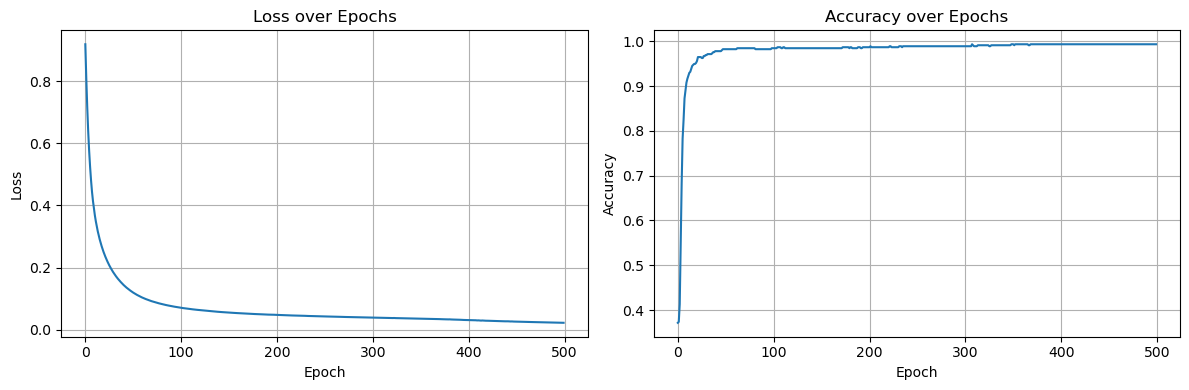

In [72]:
#  Visualize Loss and Accuracy
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.title("Loss over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.title("Accuracy over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.grid()

plt.tight_layout()
plt.show()

###  Loss over Epochs

**What it shows:**
- **Y-axis (Loss):** Measures the error between the model's predicted output and actual labels. Lower loss means better learning.
- **X-axis (Epoch):** Number of full passes through the training data.

**Interpretation:**
- **Initial Steep Drop (Epochs 0–100):**
  - The model is quickly learning the relationship between features and output.
  - Loss reduces sharply, which is expected in early training.
- **Smoother Slope After ~100 Epochs:**
  - Learning continues, but at a slower rate.
  - Indicates convergence — the model is approaching its best form.
- **Flat Line After ~300 Epochs:**
  - Loss plateaus close to zero, showing minimal error.
  - Training is essentially done; further epochs have little effect.

 **Conclusion:**  
The model is well-trained, showing proper convergence with very low final loss. No signs of overfitting are visible.

---

###  Accuracy over Epochs

**What it shows:**
- **Y-axis (Accuracy):** Fraction of correct predictions.
- **X-axis (Epoch):** Same training cycles as above.

**Interpretation:**
- **Sharp Rise Initially (0–50 Epochs):**
  - The model rapidly improves — learns the classification rules effectively.
  - Accuracy jumps from ~60% to ~95%.
- **Plateau After 100 Epochs:**
  - Accuracy stabilizes near 98–99% — very high!
  - Indicates the model is confidently and consistently classifying the training data.

 **Conclusion:**  
The model achieves excellent training accuracy quickly and maintains it. This reflects a strong ANN configuration for the dataset.


In [73]:
#  Evaluate Model on Test Data
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

# Converts probabilities into class labels:
# If probability > 0.5 → class 1 (malignant)
# Else → class 0 (benign)

print("Accuracy:", accuracy_score(y_test, y_pred))


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step 
Accuracy: 0.9824561403508771


In [74]:
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.99      0.99      0.99        71
           1       0.98      0.98      0.98        43

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



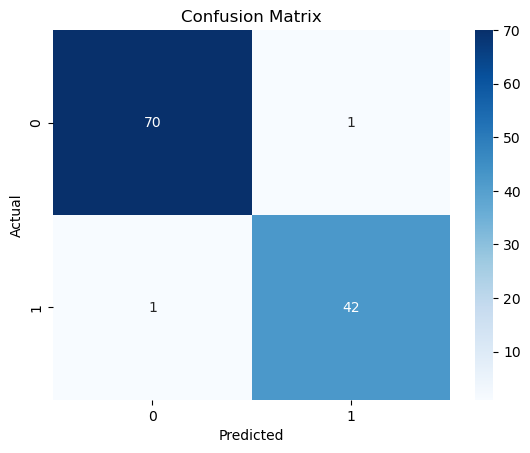

In [75]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()